# Data Analysis with Pandas

At first, we will import packages and and read the dataset.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
cancer_df = pd.read_csv("breastCancer.csv")

We can view the first few rows of the dataset using head() function

In [121]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The dimensionality of the dataset can be determined using .shape and the columns can be determined by .column fuctions

In [122]:
print(cancer_df.shape)
print("**In this Dataset we have 569 rows and 32 columns**")
print(cancer_df.columns)

(569, 33)
**In this Dataset we have 569 rows and 32 columns**
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. 

In [123]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

float64 and object are the data types of our features. We can also easily see if there are any missing values. Here, in the second column shows how many observations are present i.e 569. However, in the last column we can see that the number is 0 because all the observations in that column in Null.

To convert the data type of a column in the dataframe, use astype function. In the below example the numbers are converted to its lower ceiling int.

In [124]:
cancer_df['radius_mean']=cancer_df['radius_mean'].astype("int64")

In [125]:
cancer_df['radius_mean']

0      17
1      20
2      19
3      11
4      20
5      12
6      18
7      13
8      13
9      12
10     16
11     15
12     19
13     15
14     13
15     14
16     14
17     16
18     19
19     13
20     13
21      9
22     15
23     21
24     16
25     17
26     14
27     18
28     15
29     17
       ..
539     7
540    11
541    14
542    14
543    13
544    13
545    13
546    10
547    10
548     9
549    10
550    10
551    11
552    12
553     9
554    12
555    10
556    10
557     9
558    14
559    11
560    14
561    11
562    15
563    20
564    21
565    20
566    16
567    20
568     7
Name: radius_mean, Length: 569, dtype: int64

Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [126]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,13.637961,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.565143,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.000000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.000000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.000000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.000000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.000000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

In [127]:
cancer_df.describe(include=['object', 'bool'])

,diagnosis
count,569
unique,2
top,B
freq,357


Pandas Index.value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. 

In [128]:
cancer_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

By default, normalize is FALSE, but if True then the object returned will contain the relative frequencies of the unique values.

In [129]:
cancer_df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

# Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by radius_mean (use ascending=False to sort in descending order)

In [130]:
cancer_df.sort_values(by='radius_mean', ascending=True).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
101,862722,B,6,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,...,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382,NaN
568,92751,B,7,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN
538,921092,B,7,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,...,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938,NaN
539,921362,B,7,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,...,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660,NaN
71,859711,B,8,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,15.67,62.56,284.4,0.12070,0.24360,0.1434,0.04786,0.2254,0.10840,NaN


In [131]:
cancer_df.sort_values(by=['radius_mean','compactness_mean'], ascending=True).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
101,862722,B,6,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,...,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00,0.2932,0.09382,NaN
568,92751,B,7,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00,0.2871,0.07039,NaN
538,921092,B,7,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,...,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00,0.3058,0.09938,NaN
539,921362,B,7,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,...,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05,0.2790,0.10660,NaN
175,872113,B,8,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,...,17.04,58.36,259.2,0.11620,0.07057,0.0000,0.00,0.2592,0.07848,NaN


# Indexing and retrieving data


In [135]:
cancer_df[cancer_df['radius_mean']>13].head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
4,84358402,M,20,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
6,844359,M,18,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


What is the mean radius of malignant cancer?

In [138]:
cancer_df['radius_mean'][cancer_df['diagnosis']=='M'].mean()

17.00943396226415

What is the mean of all the columns of malignant cancer?

In [137]:
cancer_df[cancer_df['diagnosis']=='M'].mean()

id                         3.681805e+07
radius_mean                1.700943e+01
texture_mean               2.160491e+01
perimeter_mean             1.153654e+02
area_mean                  9.783764e+02
smoothness_mean            1.028985e-01
compactness_mean           1.451878e-01
concavity_mean             1.607747e-01
concave points_mean        8.799000e-02
symmetry_mean              1.929090e-01
fractal_dimension_mean     6.268009e-02
radius_se                  6.090825e-01
texture_se                 1.210915e+00
perimeter_se               4.323929e+00
area_se                    7.267241e+01
smoothness_se              6.780094e-03
compactness_se             3.228117e-02
concavity_se               4.182401e-02
concave points_se          1.506047e-02
symmetry_se                2.047240e-02
fractal_dimension_se       4.062406e-03
radius_worst               2.113481e+01
texture_worst              2.931821e+01
perimeter_worst            1.413703e+02
area_worst                 1.422286e+03


What is the maximum mean radius for Malignant cancer where perimeter_worst is greater than 160?

In [ ]:
cancer_df[(cancer_df['diagnosis']==1)&(cancer_df['perimeter_worst']>160)]['radius_mean'].max()

### Indexing Techniques

**iloc and loc**

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The loc method is used for indexing by name, while iloc() is used for indexing by numberm


In [140]:
cancer_df.loc[0:5, 'diagnosis':'perimeter_worst']

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst
0,M,17,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60
1,M,20,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80
2,M,19,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50
3,M,11,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87
4,M,20,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20
5,M,12,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40


In [141]:
cancer_df.iloc[0:5,0:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean
0,842302,M,17,10.38,122.80
1,842517,M,20,17.77,132.90
2,84300903,M,19,21.25,130.00
3,84348301,M,11,20.38,77.58
4,84358402,M,20,14.34,135.10


The ix[] indexer is a hybrid of .loc and .iloc. Generally, ix is label based and acts just as the .loc indexer. However, .ix also supports integer type selections (as in .iloc) where passed an integer. This only works where the index of the DataFrame is not integer based. ix will accept any of the inputs of .loc and .iloc.

If we need the first or the last line of the data frame, we can use the df[:1] or df[-1:] construct:

In [142]:
cancer_df[-1:]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
568,92751,B,7,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,...,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039,NaN


# Applying Functions to Cells, Columns and Rows

To apply functions to each column, use apply()

In [42]:
cancer_df = pd.read_csv("breastCancer.csv")

In [132]:
cancer_df.apply(np.max)

id                         911320502
diagnosis                          M
radius_mean                       28
texture_mean                   39.28
perimeter_mean                 188.5
area_mean                       2501
smoothness_mean               0.1634
compactness_mean              0.3454
concavity_mean                0.4268
concave points_mean           0.2012
symmetry_mean                  0.304
fractal_dimension_mean       0.09744
radius_se                      2.873
texture_se                     4.885
perimeter_se                   21.98
area_se                        542.2
smoothness_se                0.03113
compactness_se                0.1354
concavity_se                   0.396
concave points_se            0.05279
symmetry_se                  0.07895
fractal_dimension_se         0.02984
radius_worst                   36.04
texture_worst                  49.54
perimeter_worst                251.2
area_worst                      4254
smoothness_worst              0.2226
c

There are several ways to replace values in the diagnosis columns.
### 1. apply function with lambda

In [ ]:
cancer_df = pd.read_csv("breastCancer.csv")

In [112]:
cancer_df['diagnosis']=cancer_df['diagnosis'].apply(lambda diag: 1 if diag=='M' else 0)

In [115]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,0,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,0,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,1,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,1,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,0,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [114]:
cancer_df['texture_mean']=cancer_df['texture_mean'].apply(lambda rad: 1 if rad>=20 else 0)
cancer_df['texture_mean'].value_counts()

0    344
1    225
Name: texture_mean, dtype: int64

### 2. Map Method
The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:



In [26]:
d = {'M' : 1, 'B' : 0}
cancer_df1 = cancer_df['diagnosis'].map(d)
cancer_df1.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### 3. Replace Method

In [119]:
cancer_df2=cancer_df.replace({'diagnosis':d})
cancer_df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Grouping

In general, grouping data in Pandas works as follows:

df.groupby(by=grouping_columns)[columns_to_show].function()

First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
Finally, one or several functions are applied to the obtained groups per selected columns.


In [29]:
cancer_df.groupby(['diagnosis']).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


In [27]:
columns_to_show = ['radius_mean', 'texture_mean','perimeter_mean']

cancer_df.groupby(['diagnosis'])[columns_to_show].describe(percentiles=[])

radius_mean                                              \
                count       mean       std     min     50%    max   
diagnosis                                                           
B               357.0  12.146524  1.780512   6.981  12.200  17.85   
M               212.0  17.462830  3.203971  10.950  17.325  28.11   

          texture_mean                                            \
                 count       mean       std    min    50%    max   
diagnosis                                                          
B                357.0  17.914762  3.995125   9.71  17.39  33.81   
M                212.0  21.604906  3.779470  10.38  21.46  39.28   

          perimeter_mean                                               
                   count        mean        std    min     50%    max  
diagnosis                                                              
B                  357.0   78.075406  11.807438  43.79   78.18  114.6  
M                  212.0  115.365377  21.854653  71.90  114.20  188.5

## Summary Tables

We can build a contingency table using the crosstab method:

In [66]:
pd.crosstab(cancer_df['diagnosis'], cancer_df['texture_mean'])

texture_mean,0,1
diagnosis,,
B,274,83
M,70,142


In [67]:
pd.crosstab(cancer_df['diagnosis'], cancer_df['texture_mean'],normalize=True)

texture_mean,0,1
diagnosis,,
B,0.481547,0.145870
M,0.123023,0.249561


# DataFrame transformations

In [87]:
cancer_df = pd.read_csv("breastCancer.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


To drop a column:

In [88]:
cancer_df.drop(['id'],axis=1)
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In the above code, the columns were not dropped becausse the argument, inplace is considered as fault by default.

In [89]:
cancer_df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


To drop rows:

In [92]:
cancer_df.drop([1,2],axis=0,inplace=True)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.1700,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.1127,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [108]:
cancer_df0.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: object

## CountPlot

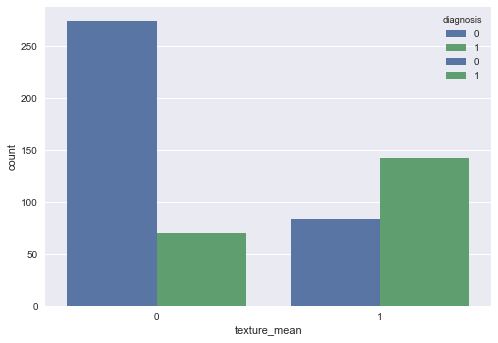

In [118]:
sns.countplot(x='texture_mean',hue='diagnosis',data=cancer_df)
plt.show()